<h3>Suport Vector Regression (SVR)</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Data.csv")
df_infos = df.iloc[:,1:-1].values
df_results = df.iloc[:,-1].values
print(df_results)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [3]:
df_results = df_results.reshape(len(df_results),1) #2D
print(df_results)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [4]:
scaller_infos = StandardScaler()
scaller_results = StandardScaler()
df_infos = scaller_infos.fit_transform(df_infos)
df_results = scaller_results.fit_transform(df_results)

In [5]:
print(df_infos)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [6]:
print(df_results)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [7]:
regressor = SVR(kernel = 'rbf')
regressor.fit(df_infos,df_results)
df_pred = regressor.predict(df_infos)

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
scaller_results.inverse_transform(regressor.predict(scaller_infos.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

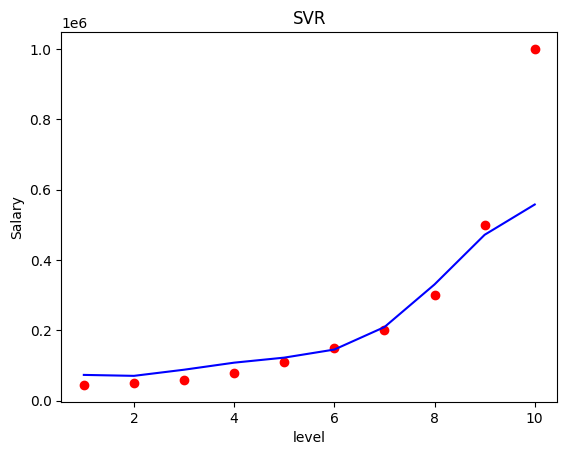

In [12]:
plt.scatter(scaller_infos.inverse_transform(df_infos.reshape(-1,1)),scaller_results.inverse_transform(df_results.reshape(-1,1)), color = "red", label = "Data")
plt.plot(scaller_infos.inverse_transform(df_infos.reshape(-1,1)), scaller_results.inverse_transform(df_pred.reshape(-1,1)), color = "blue", label = "results")
plt.title("SVR")
plt.xlabel("level")
plt.ylabel("Salary")
plt.show()